In [6]:
import neurokit2 as nk
import pandas as pd

In [4]:
# Download example multimodal physiology data
data = nk.data("bio_eventrelated_100hz")

# Preprocess the data (filter, find peaks, etc.)
processed_data, info = nk.bio_process(ecg=data["ECG"], rsp=data["RSP"], eda=data["EDA"], sampling_rate=100)

# Compute relevant features
results = nk.bio_analyze(processed_data, sampling_rate=100)
display(results)

,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,EDA_SympatheticN,EDA_Autocorrelation,RSA_P2T_Mean,RSA_P2T_Mean_log,RSA_P2T_SD,RSA_P2T_NoRSA,RSA_PorgesBohrer,RSA_Gates_Mean,RSA_Gates_Mean_log,RSA_Gates_SD
0,60.896029,[[985.8940397350993]],[[84.92562646754557]],[[nan]],[[nan]],[[nan]],[[nan]],[[nan]],[[nan]],[[72.92461861401813]],...,NaN,NaN,91.025641,4.511141,69.08404,0.0,-5.647619,8.43424,2.1323,0.167729


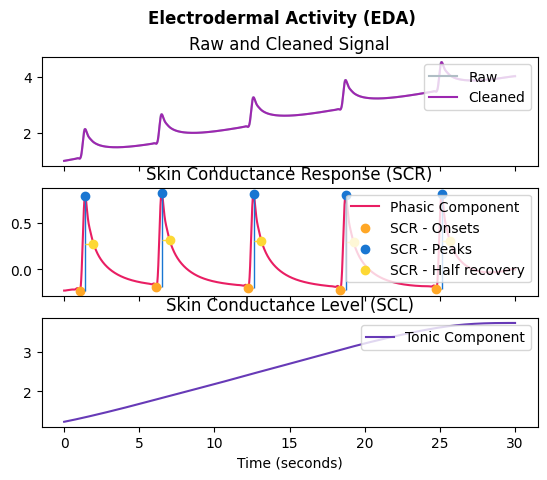

In [2]:
# Simultated EDA data : process and visualize 
eda_signal = nk.eda_simulate(duration=30, scr_number=5, drift=0.1, noise=0)
signals, info = nk.eda_process(eda_signal, sampling_rate=1000)
nk.eda_plot(signals, info)

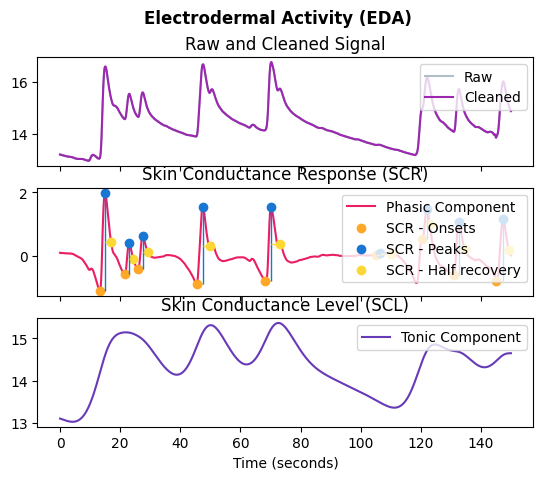

In [3]:
# Example EDA data : process and visualize
signals, info = nk.eda_process(data["EDA"], sampling_rate=100)
nk.eda_plot(signals, info)

['EDA Data' '1.403999996185302734e+01' '1.401000022888183594e+01'
 '1.398999977111816406e+01' '1.396000003814697266e+01'
 '1.392000007629394531e+01' '1.389000034332275391e+01'
 '1.386999988555908203e+01' '1.381999969482421875e+01'
 '1.378999996185302734e+01']


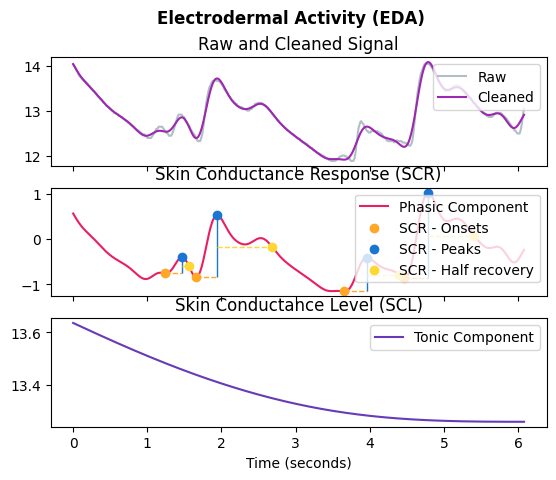

In [11]:
# Recorded EDA data : process and visualize 
csv_file_path = 'C:/Users/seinj/Teaching/Recordings_2023_EDA/csv-data/pb_01_base2.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path, header=None, names=['Column1'], skiprows=1)

# Extract the single column as a vector
real_eda = df['Column1'].values

# Print or use the resulting data vector
print(data_vector[:10])
signals, info = nk.eda_process(real_eda, sampling_rate=100)
nk.eda_plot(signals, info)